# <font color=blue>Assignments for "Data Cleaning - Outliers"</font>

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

df_states=pd.read_csv('states_all.csv')

In [2]:
for i in df_states.columns[3:]:
  df_states[i] = df_states[i].fillna(df_states.groupby('STATE')[i].transform('mean'))
  df_states[i] = df_states[i].fillna(df_states[i].mean())   

In [3]:
df_states.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

**(1)** See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


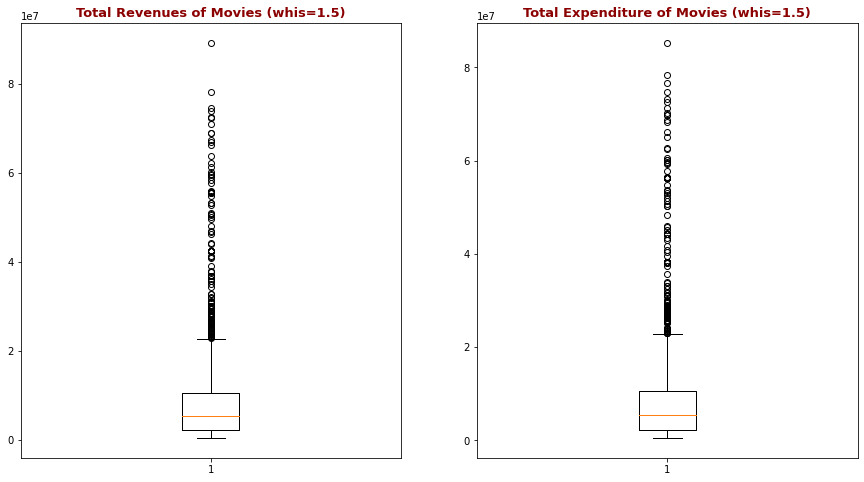

In [4]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.boxplot(df_states.TOTAL_REVENUE.dropna())
plt.title("Total Revenues of Movies (whis=1.5)", fontdict=title_font)
plt.subplot(1,2,2)
plt.boxplot(df_states.TOTAL_EXPENDITURE.dropna())
plt.title("Total Expenditure of Movies (whis=1.5)", fontdict=title_font)
plt.show()

In [5]:
print("Total revenue threshold")
z_scores = zscore(df_states["TOTAL_REVENUE"].dropna())
for threshold in range(1,9):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Total revenue threshold
Threshold value: 1
Number of Outliers: 183
------
Threshold value: 2
Number of Outliers: 77
------
Threshold value: 3
Number of Outliers: 47
------
Threshold value: 4
Number of Outliers: 32
------
Threshold value: 5
Number of Outliers: 12
------
Threshold value: 6
Number of Outliers: 2
------
Threshold value: 7
Number of Outliers: 1
------
Threshold value: 8
Number of Outliers: 0
------


In [6]:
print("Total expenditure threshold")
z_scores = zscore(df_states["TOTAL_EXPENDITURE"].dropna())
for threshold in range(1,8):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Total expenditure threshold
Threshold value: 1
Number of Outliers: 182
------
Threshold value: 2
Number of Outliers: 78
------
Threshold value: 3
Number of Outliers: 55
------
Threshold value: 4
Number of Outliers: 33
------
Threshold value: 5
Number of Outliers: 12
------
Threshold value: 6
Number of Outliers: 1
------
Threshold value: 7
Number of Outliers: 0
------


**(2)** If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

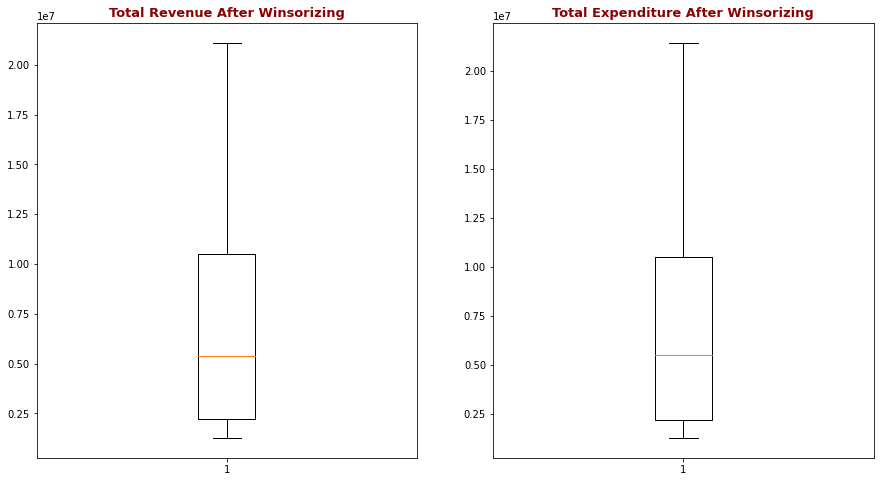

In [7]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
winsorizing= winsorize(np.array(df_states.TOTAL_REVENUE.dropna()), (0.10, 0.10))
plt.boxplot(winsorizing)
plt.title("Total Revenue After Winsorizing", fontdict=title_font)
plt.subplot(1,2,2)
winsorizing2= winsorize(np.array(df_states.TOTAL_EXPENDITURE.dropna()), (0.10, 0.10))
plt.boxplot(winsorizing2)
plt.title("Total Expenditure After Winsorizing", fontdict=title_font)
plt.show()


**(3)** Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [8]:
df_states["BUDGET_DEFICIT"]=df_states["TOTAL_REVENUE"]-df_states["TOTAL_EXPENDITURE"]
df_states["BUDGET_DEFICIT"]

0        25087.00
1        77103.00
2      -143501.00
3       -31063.00
4      -878807.00
          ...    
1710   -219078.16
1711   -185945.72
1712     -6013.28
1713    -50641.92
1714     21280.20
Name: BUDGET_DEFICIT, Length: 1715, dtype: float64

Text(0.5, 1.0, 'Budget Deficit (whis=1.5)')

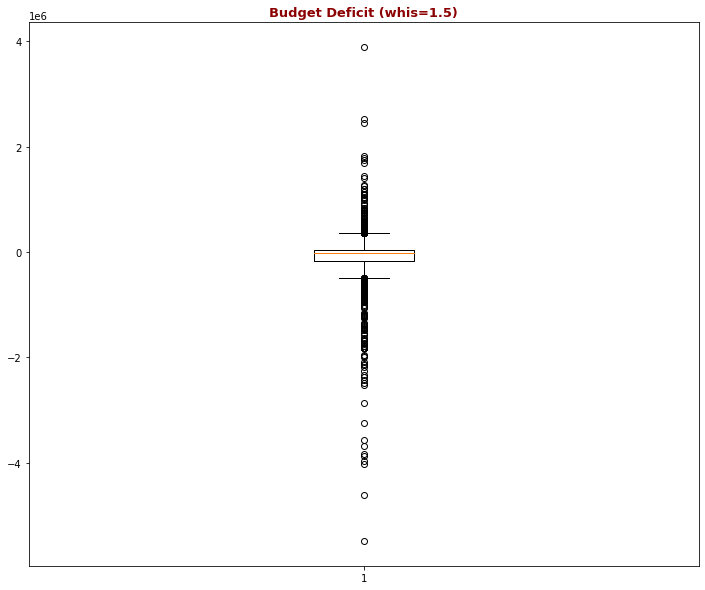

In [9]:
plt.figure(figsize=(12,10))
plt.boxplot(df_states.BUDGET_DEFICIT.dropna())
plt.title("Budget Deficit (whis=1.5)", fontdict=title_font)


In [10]:
print("Budget Deficit threshold")
z_scores = zscore(df_states["BUDGET_DEFICIT"].dropna())
for threshold in range(1,9):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Budget Deficit threshold
Threshold value: 1
Number of Outliers: 76
------
Threshold value: 2
Number of Outliers: 22
------
Threshold value: 3
Number of Outliers: 7
------
Threshold value: 4
Number of Outliers: 3
------
Threshold value: 5
Number of Outliers: 2
------
Threshold value: 6
Number of Outliers: 1
------
Threshold value: 7
Number of Outliers: 1
------
Threshold value: 8
Number of Outliers: 0
------


In [11]:
winsorizingbd= winsorize(np.array(df_states.BUDGET_DEFICIT.dropna()), (0.10, 0.10))
winsorizingbd

masked_array(data=[  25087.  ,   77103.  , -143501.  , ...,   -6013.28,
                    -50641.92,   21280.2 ],
             mask=False,
       fill_value=1e+20)

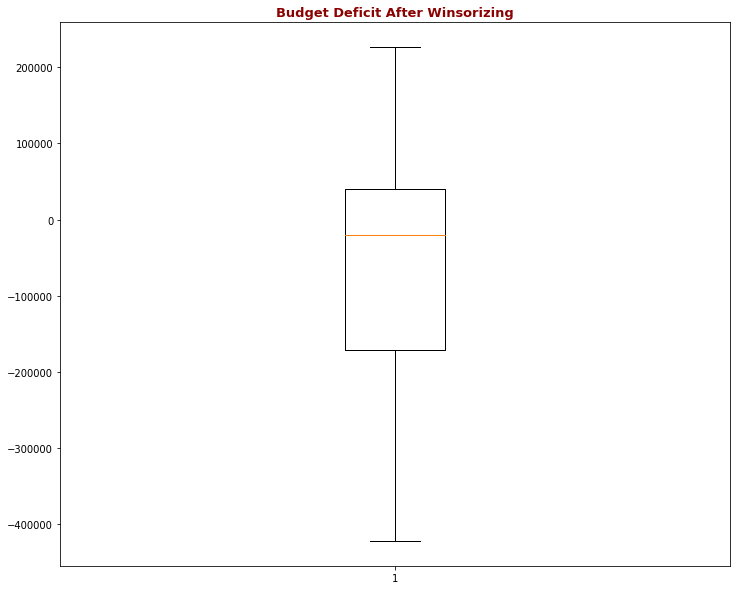

In [12]:
plt.figure(figsize=(12,10))
plt.boxplot(winsorizingbd)
plt.title("Budget Deficit After Winsorizing", fontdict=title_font)
plt.show()

**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

In [13]:
df_states["BUDGET_DEFICIT2"]=df_states["TOTAL_EXPENDITURE"]-df_states["TOTAL_REVENUE"]
df_states.BUDGET_DEFICIT2

0       -25087.00
1       -77103.00
2       143501.00
3        31063.00
4       878807.00
          ...    
1710    219078.16
1711    185945.72
1712      6013.28
1713     50641.92
1714    -21280.20
Name: BUDGET_DEFICIT2, Length: 1715, dtype: float64

Text(0.5, 1.0, 'Budget Deficit 2 (whis=1.5)')

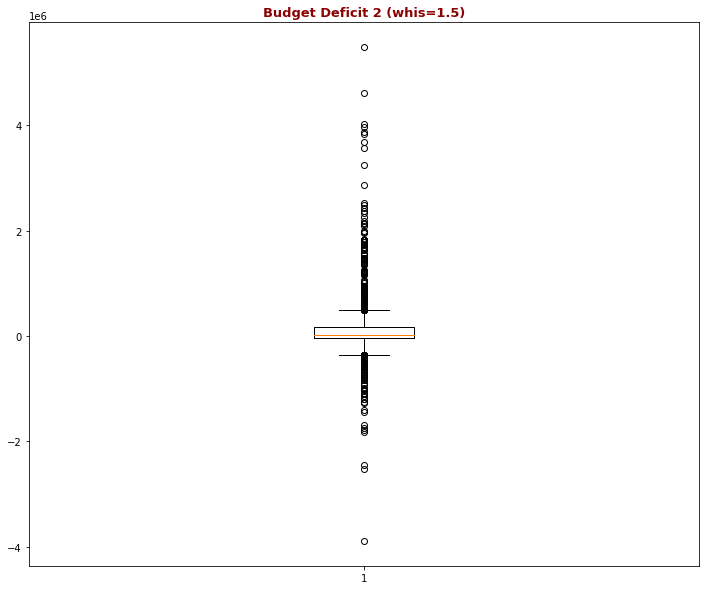

In [14]:
plt.figure(figsize=(12,10))
plt.boxplot(df_states.BUDGET_DEFICIT2.dropna())
plt.title("Budget Deficit 2 (whis=1.5)", fontdict=title_font)


In [15]:
print("New Budget Deficit")
z_scores = zscore(df_states["BUDGET_DEFICIT2"].dropna())
for threshold in range(1,12):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

New Budget Deficit
Threshold value: 1
Number of Outliers: 110
------
Threshold value: 2
Number of Outliers: 69
------
Threshold value: 3
Number of Outliers: 36
------
Threshold value: 4
Number of Outliers: 16
------
Threshold value: 5
Number of Outliers: 10
------
Threshold value: 6
Number of Outliers: 8
------
Threshold value: 7
Number of Outliers: 6
------
Threshold value: 8
Number of Outliers: 2
------
Threshold value: 9
Number of Outliers: 1
------
Threshold value: 10
Number of Outliers: 1
------
Threshold value: 11
Number of Outliers: 0
------


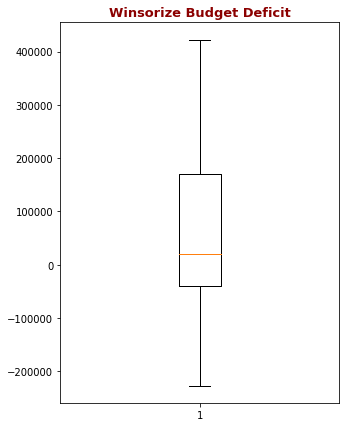

In [16]:
plt.figure(figsize=(5,7))
budgetdeficit2= winsorize(np.array(df_states.BUDGET_DEFICIT2.dropna()), (0.10, 0.10))
plt.boxplot(budgetdeficit2)
plt.title("Winsorize Budget Deficit", fontdict=title_font)
plt.show()

**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

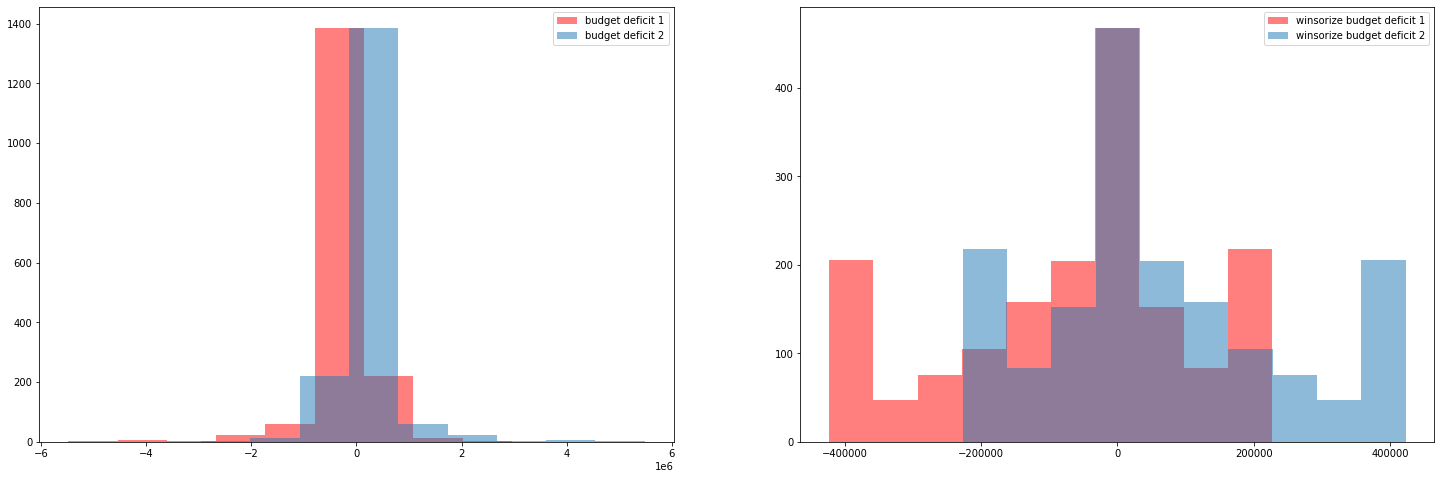

In [17]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.hist(df_states.BUDGET_DEFICIT, alpha=0.5, label='budget deficit 1', color="red") 
plt.hist(df_states.BUDGET_DEFICIT2, alpha=0.5, label='budget deficit 2') 
plt.legend(loc='upper right') 

plt.subplot(1,2,2)
plt.hist(winsorizingbd, alpha=0.5, label='winsorize budget deficit 1', color="red") 
plt.hist(budgetdeficit2, alpha=0.5, label='winsorize budget deficit 2') 
plt.legend(loc='upper right') 
plt.show()

Two graphics are mirror images of each other. One value of them is minus value, when others is positive same value.

Intersect of two is seem like normal distribution.

{'boxes': [<matplotlib.lines.Line2D at 0x7f1a7e6bdc10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1a7e6aacd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a7e6e6cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a7e6e67d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1a7e6aa250>,
  <matplotlib.lines.Line2D at 0x7f1a7e6aa790>]}

{'boxes': [<matplotlib.lines.Line2D at 0x7f1a7d987290>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1a7d98e310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a7d995310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a7d98edd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1a7d987850>,
  <matplotlib.lines.Line2D at 0x7f1a7d987d90>]}

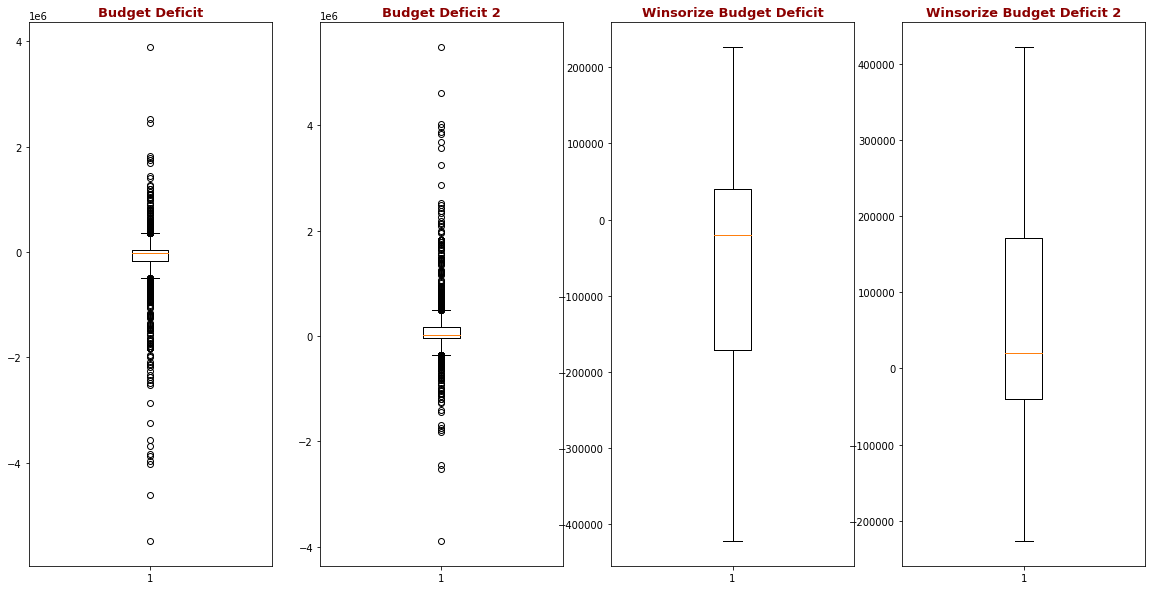

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title("Budget Deficit", fontdict=title_font)
display(plt.boxplot(df_states.BUDGET_DEFICIT.dropna()))
plt.subplot(1,4,2)
plt.title("Budget Deficit 2", fontdict=title_font)
plt.boxplot(df_states.BUDGET_DEFICIT2.dropna())
plt.subplot(1,4,3)
plt.title("Winsorize Budget Deficit", fontdict=title_font)
plt.boxplot(winsorizingbd)
plt.subplot(1,4,4)
plt.title("Winsorize Budget Deficit 2", fontdict=title_font)
plt.boxplot(budgetdeficit2)


They are opposite of each other.

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

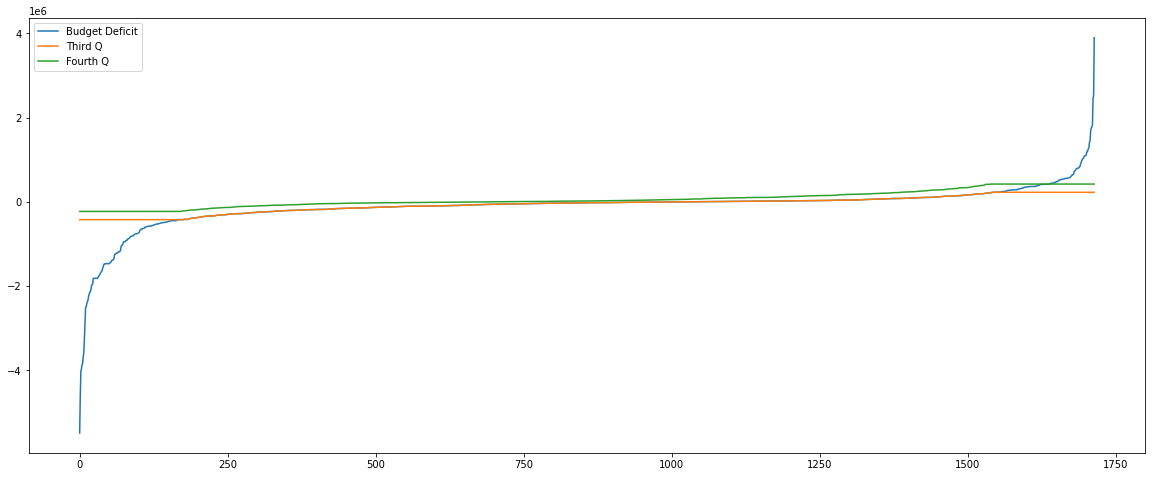

In [19]:
plt.figure(figsize=(20,8))
plt.plot(np.sort(df_states["BUDGET_DEFICIT"]),label="Budget Deficit")
plt.plot(np.sort(winsorizingbd),label="Third Q")
plt.plot(np.sort(budgetdeficit2),label="Fourth Q")
plt.legend(loc="upper left")
plt.show()

**Third winsorizing methos is better method fourth method. Third method has more intersect points with original data.**